# 3 Fitting Circles

In [1]:
import numpy as np
import matplotlib.pyplot as plt

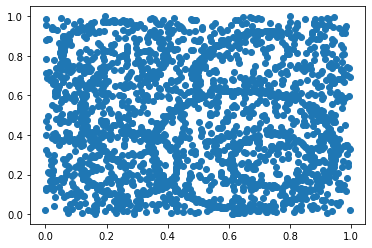

In [2]:
data = np.load('circles.npy')
plt.scatter(data[:, 0], data[:, 1])
plt.show()

## 3.1 RANSAC

In [25]:
def make_circle(point):
    origin = point[0]
    point_origin = point - origin # make origin the first random point
    A = 2 * point_origin[1:, :]
    b = point_origin[1:, 0]**2 + point_origin[1:, 1]**2
    center = np.linalg.inv(A) @ b
    r = np.sqrt(center[0]**2 + center[1]**2)
    return center + origin, r

In [26]:
def ransac_iter(data_iter, outliers, epsilon):
    rand_ind = np.random.choice(outliers, 3, replace=False)
    rand_points = data_iter[rand_ind].reshape((3, 2))
    center, radius = make_circle(rand_points)
    data_iter = data_iter.reshape(-1, 2)
    inliers = np.abs((data_iter[:,0] - center[0])**2 + (data_iter[:,1] - center[1])**2 - radius**2) < epsilon
    return inliers, center, radius

In [47]:
def ransac(data, circle_no, iter_no, epsilon):
    best_rad, best_center, best_inl = [], [], []
    
    for i in range(circle_no):
        outliers = np.arange(data.shape[0], dtype='int')
        inliers_best = np.zeros(data.shape[0], dtype=bool)
        score_best = 0
        center_best, radius_best = np.zeros(2), 0

        for i in range(iter_no):
            inliers, center, radius = ransac_iter(data, outliers, epsilon)
            score = np.sum(inliers)

            if score > score_best:
                score_best, inliers_best, center_best, radius_best = score, inliers, center, radius

        best_rad.append(radius_best)
        best_center.append(center_best)
        best_inl.append(data[inliers_best])
        data = data[np.argwhere(inliers_best!=1)]
    bests = [best_rad, best_center, best_inl]
    return bests

IndexError: invalid index to scalar variable.

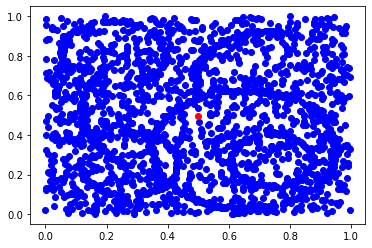

In [60]:
fitted_circles = ransac(data, 6, 1000, 0.05)
plt.scatter(data[:,0], data[:,1], c='b')

for plot_circ in fitted_circles:
    plt.scatter(plot_circ[2], plot_circ[2], c='red')
    circle = plt.Circle(plot_circ[1], radius=plot_circ[0], fill=False)
    plt.gca().add_patch(circle)

plt.show()